In [1]:
import pandas as pd

In [4]:
data=pd.read_csv('advertising.csv')

In [5]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


In [7]:
data.shape

(900, 10)

In [9]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,65.425800,35.903333,55315.072767,180.702344,0.483333,0.487778
std,15.712563,8.744462,13376.323458,43.823397,0.500000,0.500129
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.000000
25%,52.160000,29.000000,47494.787500,139.245000,0.000000,0.000000
50%,68.945000,35.000000,57631.345000,184.555000,0.000000,0.000000
75%,78.610000,41.000000,65666.300000,219.720000,1.000000,1.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.000000


### HOW THE AGE OF PERSON AFFECTS THE USER ADVERTISEMENT CLICK

In [10]:
data['Clicked on Ad'].value_counts()

0    461
1    439
Name: Clicked on Ad, dtype: int64

In [12]:
age_groups= pd.cut(data['Age'],bins=[0,10,20,30,40,50,60,70])

In [13]:
age_groups.value_counts()

(30, 40]    372
(20, 30]    264
(40, 50]    190
(50, 60]     63
(10, 20]     10
(60, 70]      1
(0, 10]       0
Name: Age, dtype: int64

In [15]:
import matplotlib. pyplot as plt
import seaborn as sns
sns.set()

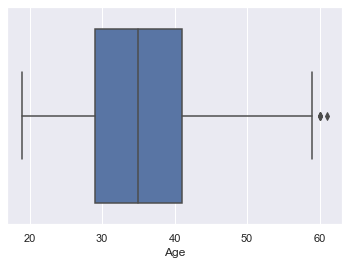

In [18]:
sns.boxplot(data['Age'])

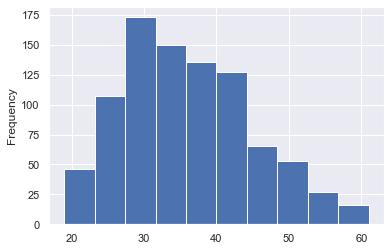

In [20]:
data['Age'].plot(kind='hist',label='All users')


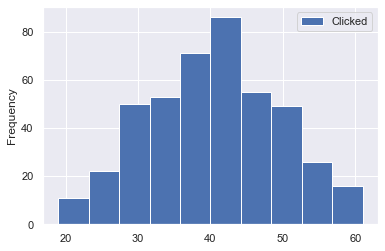

In [24]:
data['Age'][data['Clicked on Ad']==1].plot(kind='hist',label='Clicked')
plt.legend()

### HOW GENDER OF A PERSON  AFFECTS THE USER ADVERTISEMENT CLICK

In [32]:
data['Male'].value_counts()

0    465
1    435
Name: Male, dtype: int64

### HOW COUNTRY OF THE PERSON AFFECTS THE USER ADVERTISEMENT CLICK

In [33]:
data['Country']

0          Tunisia
1            Nauru
2       San Marino
3            Italy
4          Iceland
          ...     
895        Belarus
896         Taiwan
897    El Salvador
898         Taiwan
899           Peru
Name: Country, Length: 900, dtype: object

In [41]:
country_data= pd.crosstab(data['Country'], data['Clicked on Ad'])

In [42]:
country_data['total']=country_data.sum(axis=1)

In [45]:
country_data= country_data.apply(lambda x:
                                round(100*x/country_data['total']))

In [46]:
country_data.drop('total',axis=1,inplace=True)

In [47]:
country_data.head()

Clicked on Ad,0,1
Country,,
Afghanistan,29.0,71.0
Albania,50.0,50.0
Algeria,50.0,50.0
American Samoa,40.0,60.0
Andorra,0.0,100.0


In [48]:
country_data[country_data[1]==100.0].index

Index(['Andorra', 'British Indian Ocean Territory (Chagos Archipelago)',
       'Ethiopia', 'Germany', 'Guatemala', 'Heard Island and McDonald Islands',
       'Kenya', 'Kiribati', 'Latvia', 'Liechtenstein', 'Lithuania', 'Macao',
       'Marshall Islands', 'Montenegro', 'Montserrat', 'New Caledonia',
       'Northern Mariana Islands', 'Palestinian Territory', 'Romania',
       'Saint Barthelemy', 'Saint Kitts and Nevis', 'Sao Tome and Principe',
       'Sierra Leone', 'Slovenia', 'Spain', 'Uganda', 'Uzbekistan'],
      dtype='object', name='Country')

### HOW daily internet usage affects the user advertisement click

In [49]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10/01/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03/06/2016 3:36,0


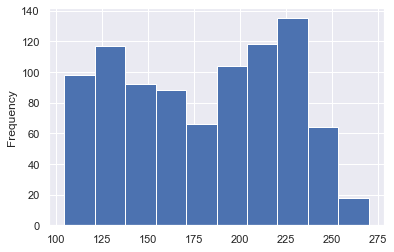

In [51]:
data['Daily Internet Usage'].plot(kind='hist')

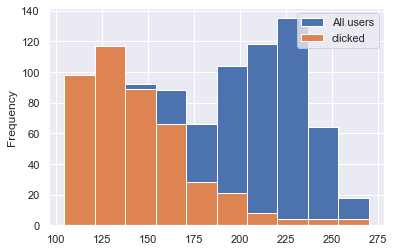

In [53]:
data['Daily Internet Usage'].plot(kind='hist',label='All users')
data['Daily Internet Usage'][data['Clicked on Ad']==1].plot(kind='hist',
                                                           label='clicked')
plt.legend()

### MACHINE LEARNING

In [54]:
 from sklearn.neighbors import KNeighborsClassifier

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
model= KNeighborsClassifier()

In [57]:
numerical_cols=data.select_dtypes(['int64','float64']).columns

In [58]:
training_data= data[numerical_cols]

In [59]:
output_data=data['Clicked on Ad']

In [60]:
training_data.drop('Clicked on Ad',axis=1, inplace=True)

C:\Users\Archana\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
X,x_test,Y,y_test= train_test_split(training_data,output_data,
                                   test_size=0.3,random_state=42)

In [64]:
model.fit(X,Y)###TRAINING

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
predictions= model.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_test,predictions)

0.6148148148148148

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
lr_model= LogisticRegression()

In [71]:
lr_model.fit(X,Y)

C:\Users\Archana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
lr_predictions = lr_model.predict(x_test)

In [73]:
accuracy_score(lr_predictions,y_test)

0.8777777777777778

#### EXPORTING THE ML MOEL

In [75]:
from sklearn.externals import joblib

C:\Users\Archana\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [76]:
joblib.dump(lr_model,"advertisment_model.sav")

['advertisment_model.sav']

In [78]:
lr_model.predict(([73.27, 45, 67301.39,216.24,0])

ValueError: Expected 2D array, got 1D array instead:
array=[7.327000e+01 4.500000e+01 6.730139e+04 2.162400e+02 0.000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.